In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['TPR','TNR','FPR','FNR','AUC','G-Mean','F1', 'G-Measure']
report = pd.DataFrame(columns = column_names)
columns = ['id',
 'Año',
 'Kilometros',
 'Combustible',
 'Mano',
 'Consumo',
 'Motor_CC',
 'Potencia',
 'Asientos',
 'Descuento',
 'Precio_cat']
columns_test = ['id',
 'Año',
 'Kilometros',
 'Combustible',
 'Mano',
 'Consumo',
 'Motor_CC',
 'Potencia',
 'Asientos',
 'Descuento']
seed = 2232527064

In [3]:
import math

def cmdata_report(cm, classifier, data):# add a df as parameter
    total = cm.sum()
    TP = cm[0,0]
    FN = cm[0,1]
    FP = cm[1,0]
    TN = cm[1,1]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(FP+TN)
    FNR = FN/(FN+TP)
    ratio = (cm[0,0]+cm[1,1])/total
    PPV = TP/(TP+FP)
    AUC = (1 + TPR - FPR)/2
    GMEAN = math.sqrt(TNR*TPR)
    F1 = 2*TP/(2*TP+FP+FN)
    GMEASURE = math.sqrt(PPV*TPR)
    
    s = pd.Series([TPR,TNR,FPR,FNR,AUC,GMEAN,F1,GMEASURE], name=classifier, index=report.columns)
    df = data.append(s)
    return df

In [4]:
def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

In [5]:
train = pd.read_csv("../csv/train.csv", na_values='?')
test = pd.read_csv("../csv/test.csv", na_values='?')

train = train[columns].copy()
test = test[columns_test].copy()
print(test.shape)

(1159, 10)


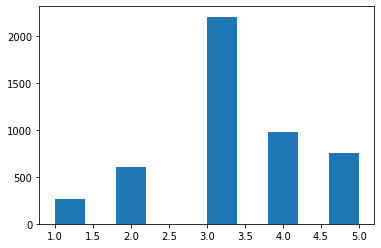

Class: 3, ocurrences: 2211 -> 45.88088815106869%
Class: 4, ocurrences: 978 -> 20.29466694334924%
Class: 5, ocurrences: 759 -> 15.750155633948951%
Class: 2, ocurrences: 602 -> 12.492218302552397%
Class: 1, ocurrences: 269 -> 5.582070969080722%


In [6]:
import matplotlib.pyplot as plt

plt.hist(train['Precio_cat'])
plt.show()

classes = train['Precio_cat'].value_counts(ascending=False)
total = classes.sum()
for i in range(classes.size):
    print("Class: "+str(classes.index[i])+", ocurrences: "+str(classes.iloc[i])+" -> "+str((classes.iloc[i]/total)*100)+"%")

initial_n = len(train['Precio_cat'].index)

In [7]:
cols = train.columns.tolist()
print(cols)

['id', 'Año', 'Kilometros', 'Combustible', 'Mano', 'Consumo', 'Motor_CC', 'Potencia', 'Asientos', 'Descuento', 'Precio_cat']


In [8]:
cols = train.columns.tolist()
for i in cols:
    print(i)
    print(train[i].unique())

id
[1.000e+00 2.000e+00 3.000e+00 ... 4.817e+03 4.818e+03 4.819e+03]
Año
[2012. 2016. 2013. 2017. 2009. 2014. 2011. 2015. 2008. 2010. 2018. 2006.
   nan 2019. 2005. 2007. 2003. 2004. 2001. 1998. 2002. 2000. 1999.]
Kilometros
[83000.  4800. 26000. ... 60033. 40158. 65743.]
Combustible
['Diesel' 'Petrol' nan 'CNG' 'LPG' 'Electric']
Mano
['First' 'Second' 'Third' nan 'Fourth & Above']
Consumo
['23.4 kmpl' '20.51 kmpl' '25.32 kmpl' '18.5 kmpl' '18.7 kmpl' '17.8 kmpl'
 '16.8 kmpl' '18.6 kmpl' '25.2 kmpl' '10.91 kmpl' '12.99 kmpl' '17.5 kmpl'
 '25.8 kmpl' '18.25 kmpl' '10.0 kmpl' '11.5 kmpl' '19.1 kmpl' '14.21 kmpl'
 '14.16 kmpl' '17.43 kmpl' '18.0 kmpl' '15.7 kmpl' '16.0 kmpl'
 '21.43 kmpl' '21.64 kmpl' '20.73 kmpl' '14.0 kmpl' '17.9 kmpl'
 '28.4 kmpl' '15.96 kmpl' nan '23.65 kmpl' '20.36 kmpl' '21.9 kmpl'
 '22.95 kmpl' '23.59 kmpl' '17.57 kmpl' '21.27 kmpl' '17.3 kmpl'
 '22.32 kmpl' '18.9 kmpl' '24.7 kmpl' '24.0 kmpl' '11.0 kmpl' '13.0 kmpl'
 '16.47 kmpl' '17.21 kmpl' '13.6 kmpl' '26.59 km

In [9]:
train.head()

,id,Año,Kilometros,Combustible,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,2012.0,83000.0,Diesel,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,3
1,2.0,2016.0,4800.0,Petrol,First,20.51 kmpl,998 CC,67.04 bhp,5.0,NaN,3
2,3.0,2016.0,26000.0,Diesel,First,25.32 kmpl,1198 CC,77 bhp,6.0,NaN,3
3,4.0,2013.0,56127.0,Petrol,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,3
4,5.0,2017.0,41981.0,Petrol,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,NaN,3


# Preprocessing data

First of all, we get all numbers from string format

In [10]:
train['Descuento'] = train['Descuento'].fillna(0)
test['Descuento'] = test['Descuento'].fillna(0)

train['Combustible'].fillna(value=train['Combustible'].value_counts().index[0],inplace =True)
train['Mano'].fillna(value=train['Mano'].value_counts().index[0],inplace =True)

In [11]:
train['Combustible'].value_counts(dropna=False)

Diesel      2618
Petrol      2151
CNG           42
LPG            7
Electric       1
Name: Combustible, dtype: int64

In [12]:
import re
import math

for index, row in train.iterrows():
    #print(row.Consumo)
    consumo = row.Consumo
    motor = row.Motor_CC
    potencia = row.Potencia
    
    if type(consumo) == str:
        train.loc[index,'Consumo'] = float(re.findall(r"^\d+\.\d+", consumo)[0])
    if type(motor) == str:
        train.loc[index,'Motor_CC'] = float(re.findall(r"^\d+", motor)[0])
    if type(potencia) == str:
        train.loc[index,'Potencia'] = float(re.findall(r"^\d+", potencia)[0])
        
for index, row in test.iterrows():
    #print(row.Consumo)
    consumo = row.Consumo
    motor = row.Motor_CC
    potencia = row.Potencia
    
    if type(consumo) == str:
        test.loc[index,'Consumo'] = float(re.findall(r"^\d+\.\d+", consumo)[0])
    if type(motor) == str:
        test.loc[index,'Motor_CC'] = float(re.findall(r"^\d+", motor)[0])
    if type(potencia) == str:
        test.loc[index,'Potencia'] = float(re.findall(r"^\d+", potencia)[0])
        
train['Consumo'] = train['Consumo'].astype(float)
train['Motor_CC'] = train['Motor_CC'].astype(float)
train['Potencia'] = train['Potencia'].astype(float)

test['Consumo'] = test['Consumo'].astype(float)
test['Motor_CC'] = test['Motor_CC'].astype(float)
test['Potencia'] = test['Potencia'].astype(float)

train.head()

,id,Año,Kilometros,Combustible,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,2012.0,83000.0,Diesel,First,23.40,1248.0,74.0,5.0,0.0,3
1,2.0,2016.0,4800.0,Petrol,First,20.51,998.0,67.0,5.0,0.0,3
2,3.0,2016.0,26000.0,Diesel,First,25.32,1198.0,77.0,6.0,0.0,3
3,4.0,2013.0,56127.0,Petrol,First,18.50,1197.0,80.0,5.0,0.0,3
4,5.0,2017.0,41981.0,Petrol,First,18.70,1199.0,88.0,5.0,0.0,3


In [13]:
from sklearn import preprocessing
le_combustible = preprocessing.LabelEncoder()
le_mano = preprocessing.LabelEncoder()

data = train.copy()
#data_without_nan = data_without_nan.dropna()
data['Combustible'] = le_combustible.fit_transform(data['Combustible'])
data['Mano'] = le_mano.fit_transform(data['Mano'])
#imputer_num = SimpleImputer(missing_values=np.NaN, strategy='mean')
#data_without_nan.Año = imputer_num.fit_transform(data_without_nan.Año.values.reshape(-1,1))[:,0]
#data_without_nan.Año = imputer_num.fit_transform(data_without_nan.Año.values.reshape(-1,1))[:,0]
cols1 = data.select_dtypes([np.number]).columns
cols2 = data.select_dtypes(exclude = [np.number]).columns
data[cols1] = data[cols1].fillna(data[cols1].mean())
data[cols2] = data[cols2].fillna(data[cols2].mode().iloc[0])

test['Combustible'] = le_combustible.fit_transform(test['Combustible'])
test['Mano'] = le_mano.fit_transform(test['Mano'])

In [14]:
data.head()

,id,Año,Kilometros,Combustible,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,2012.0,83000.0,1,0,23.40,1248.0,74.0,5.0,0.0,3
1,2.0,2016.0,4800.0,4,0,20.51,998.0,67.0,5.0,0.0,3
2,3.0,2016.0,26000.0,1,0,25.32,1198.0,77.0,6.0,0.0,3
3,4.0,2013.0,56127.0,4,0,18.50,1197.0,80.0,5.0,0.0,3
4,5.0,2017.0,41981.0,4,0,18.70,1199.0,88.0,5.0,0.0,3


In [15]:
cols = data.columns.tolist()
for i in cols:
    print(i)
    print(data[i].unique())

id
[1.000e+00 2.000e+00 3.000e+00 ... 4.817e+03 4.818e+03 4.819e+03]
Año
[2012.         2016.         2013.         2017.         2009.
 2014.         2011.         2015.         2008.         2010.
 2018.         2006.         2013.57109754 2019.         2005.
 2007.         2003.         2004.         2001.         1998.
 2002.         2000.         1999.        ]
Kilometros
[83000.  4800. 26000. ... 60033. 40158. 65743.]
Combustible
[1 4 0 3 2]
Mano
[0 2 3 1]
Consumo
[23.4        20.51       25.32       18.5        18.7        17.8
 16.8        18.6        25.2        10.91       12.99       17.5
 25.8        18.25       10.         11.5        19.1        14.21
 14.16       17.43       18.         15.7        16.         21.43
 21.64       20.73       14.         17.9        28.4        15.96
 18.25417615 23.65       20.36       21.9        22.95       23.59
 17.57       21.27       17.3        22.32       18.9        24.7
 24.         11.         13.         16.47       17.21     

# erase all missing data

In [16]:
#data_without_nan = data_without_nan.drop('Tipo_marchas', axis=1).drop('Nombre', axis=1).drop('id', axis=1).drop('Ciudad', axis=1)
test_id = test.id
#test = test.drop('Tipo_marchas', axis=1).drop('Nombre', axis=1).drop('id', axis=1).drop('Ciudad', axis=1)
#target = data.Precio_cat
data = data.drop('id', axis=1)
test = test.drop('id', axis=1)

X = data.drop('Precio_cat', axis=1)
y = data['Precio_cat']


In [17]:
'''import smote_variants as sv
oversampler = sv.MSMOTE(random_state=seed)
X_, y_ = sv.MulticlassOversampling(
    oversampler=oversampler, 
    strategy='eq_1_vs_many_successive').sample(X.to_numpy(), y.to_numpy())

X = pd.DataFrame(data=X_, columns=X.columns)
y = pd.Series(y_, name=y.name)
'''
target = y

Now, train the model

In [18]:
import random
# get random seed parameter for classifiers
#random_seed = random.randrange(2**32 - 1)
#seed = random_seed
# seed used at kaggle submission
#seed = 2232527064
#print("random_seed: "+str(random_seed))
from sklearn.model_selection import StratifiedKFold
cv_ = StratifiedKFold(n_splits=5, shuffle=True)
print("Actual seed: "+str(seed))

Actual seed: 2232527064


In [19]:
#from mlxtend.classifier import StackingCVClassifier

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
test = sc.transform(test)

In [22]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier  
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


'''estimators = [
    ('rf1', RandomForestClassifier(random_state=seed, n_estimators=200, criterion='entropy')),
    ('knn', KNeighborsClassifier()),
    ('nn', MLPClassifier(random_state=seed)),
    ('lgb', lgb.LGBMClassifier(random_state=seed, n_jobs=-1))
]'''
estimators = [
    ('lr', LogisticRegression(random_state=seed, multi_class='ovr', solver='liblinear', C=1)),
    ('gbc', GradientBoostingClassifier(random_state=seed)),
    ('rf1', RandomForestClassifier(random_state=seed, n_estimators=200, criterion='gini')),
    ('rf2', RandomForestClassifier(random_state=seed, n_estimators=200, criterion='entropy')),
    ('et1', ExtraTreesClassifier(random_state=seed, n_estimators=200, criterion='gini')),
    ('et2', ExtraTreesClassifier(random_state=seed, n_estimators=200, criterion='entropy')),
    ('lgb', lgb.LGBMClassifier(random_state=seed, n_jobs=-1)),
    ('nn', MLPClassifier(random_state=seed))
    ]

#final_est = RandomForestClassifier(random_state=seed)
final_est = CatBoostClassifier(random_state=seed)
#final_est = lgb.LGBMClassifier(random_state=seed, n_jobs=-1)
clf = StackingClassifier(
    estimators=estimators, final_estimator=final_est,cv=cv_
    )
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=seed
    )
#print(clf.fit(X_train, y_train).score(X_test, y_test))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
rf_cmatrix = confusion_matrix(y_test, y_pred)
rf_report = get_classification_report(y_test, y_pred)
report = cmdata_report(rf_cmatrix, 'stacking', report)

/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimi

Learning rate set to 0.084485
0:	learn: 1.4312261	total: 70.5ms	remaining: 1m 10s
1:	learn: 1.3081124	total: 93ms	remaining: 46.4s
2:	learn: 1.2016856	total: 115ms	remaining: 38.2s
3:	learn: 1.1161505	total: 137ms	remaining: 34.1s
4:	learn: 1.0454445	total: 164ms	remaining: 32.6s
5:	learn: 0.9859575	total: 189ms	remaining: 31.3s
6:	learn: 0.9349700	total: 209ms	remaining: 29.7s
7:	learn: 0.8884416	total: 232ms	remaining: 28.8s
8:	learn: 0.8492262	total: 255ms	remaining: 28s
9:	learn: 0.8148168	total: 282ms	remaining: 27.9s
10:	learn: 0.7831343	total: 304ms	remaining: 27.3s
11:	learn: 0.7572575	total: 323ms	remaining: 26.6s
12:	learn: 0.7329225	total: 342ms	remaining: 26s
13:	learn: 0.7116133	total: 365ms	remaining: 25.7s
14:	learn: 0.6921879	total: 384ms	remaining: 25.2s
15:	learn: 0.6749668	total: 404ms	remaining: 24.8s
16:	learn: 0.6599434	total: 426ms	remaining: 24.6s
17:	learn: 0.6460715	total: 452ms	remaining: 24.7s
18:	learn: 0.6325314	total: 472ms	remaining: 24.4s
19:	learn: 0.6

160:	learn: 0.3980111	total: 3.32s	remaining: 17.3s
161:	learn: 0.3973573	total: 3.34s	remaining: 17.3s
162:	learn: 0.3968873	total: 3.36s	remaining: 17.3s
163:	learn: 0.3960282	total: 3.38s	remaining: 17.3s
164:	learn: 0.3952138	total: 3.4s	remaining: 17.2s
165:	learn: 0.3949361	total: 3.42s	remaining: 17.2s
166:	learn: 0.3943422	total: 3.44s	remaining: 17.2s
167:	learn: 0.3934521	total: 3.46s	remaining: 17.1s
168:	learn: 0.3930102	total: 3.48s	remaining: 17.1s
169:	learn: 0.3924384	total: 3.5s	remaining: 17.1s
170:	learn: 0.3916579	total: 3.52s	remaining: 17.1s
171:	learn: 0.3912563	total: 3.55s	remaining: 17.1s
172:	learn: 0.3904530	total: 3.57s	remaining: 17s
173:	learn: 0.3897376	total: 3.58s	remaining: 17s
174:	learn: 0.3892437	total: 3.6s	remaining: 17s
175:	learn: 0.3887610	total: 3.62s	remaining: 17s
176:	learn: 0.3882982	total: 3.64s	remaining: 16.9s
177:	learn: 0.3876768	total: 3.66s	remaining: 16.9s
178:	learn: 0.3869404	total: 3.68s	remaining: 16.9s
179:	learn: 0.3864147	t

323:	learn: 0.3159441	total: 6.57s	remaining: 13.7s
324:	learn: 0.3156491	total: 6.59s	remaining: 13.7s
325:	learn: 0.3149955	total: 6.61s	remaining: 13.7s
326:	learn: 0.3145463	total: 6.63s	remaining: 13.6s
327:	learn: 0.3140350	total: 6.65s	remaining: 13.6s
328:	learn: 0.3137192	total: 6.67s	remaining: 13.6s
329:	learn: 0.3133034	total: 6.69s	remaining: 13.6s
330:	learn: 0.3130092	total: 6.71s	remaining: 13.6s
331:	learn: 0.3127616	total: 6.73s	remaining: 13.5s
332:	learn: 0.3123751	total: 6.75s	remaining: 13.5s
333:	learn: 0.3120692	total: 6.76s	remaining: 13.5s
334:	learn: 0.3116285	total: 6.78s	remaining: 13.5s
335:	learn: 0.3114068	total: 6.8s	remaining: 13.4s
336:	learn: 0.3109685	total: 6.82s	remaining: 13.4s
337:	learn: 0.3107346	total: 6.84s	remaining: 13.4s
338:	learn: 0.3101971	total: 6.86s	remaining: 13.4s
339:	learn: 0.3098877	total: 6.88s	remaining: 13.3s
340:	learn: 0.3095552	total: 6.89s	remaining: 13.3s
341:	learn: 0.3091732	total: 6.91s	remaining: 13.3s
342:	learn: 0

488:	learn: 0.2589428	total: 9.8s	remaining: 10.2s
489:	learn: 0.2586118	total: 9.82s	remaining: 10.2s
490:	learn: 0.2583104	total: 9.84s	remaining: 10.2s
491:	learn: 0.2579087	total: 9.86s	remaining: 10.2s
492:	learn: 0.2575088	total: 9.88s	remaining: 10.2s
493:	learn: 0.2572817	total: 9.9s	remaining: 10.1s
494:	learn: 0.2570754	total: 9.92s	remaining: 10.1s
495:	learn: 0.2568638	total: 9.94s	remaining: 10.1s
496:	learn: 0.2566880	total: 9.96s	remaining: 10.1s
497:	learn: 0.2563235	total: 9.97s	remaining: 10.1s
498:	learn: 0.2560260	total: 9.99s	remaining: 10s
499:	learn: 0.2555095	total: 10s	remaining: 10s
500:	learn: 0.2551718	total: 10s	remaining: 10s
501:	learn: 0.2548948	total: 10.1s	remaining: 9.98s
502:	learn: 0.2545042	total: 10.1s	remaining: 9.96s
503:	learn: 0.2542361	total: 10.1s	remaining: 9.94s
504:	learn: 0.2539400	total: 10.1s	remaining: 9.92s
505:	learn: 0.2536231	total: 10.1s	remaining: 9.89s
506:	learn: 0.2531688	total: 10.2s	remaining: 9.87s
507:	learn: 0.2528764	to

652:	learn: 0.2130179	total: 13s	remaining: 6.92s
653:	learn: 0.2125501	total: 13.1s	remaining: 6.91s
654:	learn: 0.2123627	total: 13.1s	remaining: 6.88s
655:	learn: 0.2121565	total: 13.1s	remaining: 6.87s
656:	learn: 0.2119268	total: 13.1s	remaining: 6.84s
657:	learn: 0.2116659	total: 13.1s	remaining: 6.83s
658:	learn: 0.2114321	total: 13.2s	remaining: 6.8s
659:	learn: 0.2111883	total: 13.2s	remaining: 6.79s
660:	learn: 0.2109726	total: 13.2s	remaining: 6.76s
661:	learn: 0.2107286	total: 13.2s	remaining: 6.74s
662:	learn: 0.2104289	total: 13.2s	remaining: 6.72s
663:	learn: 0.2102638	total: 13.3s	remaining: 6.71s
664:	learn: 0.2101116	total: 13.3s	remaining: 6.69s
665:	learn: 0.2100039	total: 13.3s	remaining: 6.67s
666:	learn: 0.2097399	total: 13.3s	remaining: 6.65s
667:	learn: 0.2095350	total: 13.3s	remaining: 6.63s
668:	learn: 0.2092244	total: 13.4s	remaining: 6.61s
669:	learn: 0.2089768	total: 13.4s	remaining: 6.58s
670:	learn: 0.2085574	total: 13.4s	remaining: 6.57s
671:	learn: 0.2

811:	learn: 0.1791710	total: 16.2s	remaining: 3.75s
812:	learn: 0.1790883	total: 16.2s	remaining: 3.73s
813:	learn: 0.1788588	total: 16.2s	remaining: 3.71s
814:	learn: 0.1785858	total: 16.2s	remaining: 3.69s
815:	learn: 0.1784088	total: 16.3s	remaining: 3.67s
816:	learn: 0.1782828	total: 16.3s	remaining: 3.65s
817:	learn: 0.1781488	total: 16.3s	remaining: 3.63s
818:	learn: 0.1780653	total: 16.3s	remaining: 3.61s
819:	learn: 0.1779342	total: 16.3s	remaining: 3.59s
820:	learn: 0.1778110	total: 16.4s	remaining: 3.57s
821:	learn: 0.1775741	total: 16.4s	remaining: 3.55s
822:	learn: 0.1773445	total: 16.4s	remaining: 3.53s
823:	learn: 0.1771091	total: 16.4s	remaining: 3.51s
824:	learn: 0.1769574	total: 16.4s	remaining: 3.49s
825:	learn: 0.1768098	total: 16.5s	remaining: 3.47s
826:	learn: 0.1766783	total: 16.5s	remaining: 3.45s
827:	learn: 0.1764691	total: 16.5s	remaining: 3.43s
828:	learn: 0.1763005	total: 16.5s	remaining: 3.41s
829:	learn: 0.1761236	total: 16.5s	remaining: 3.39s
830:	learn: 

975:	learn: 0.1522307	total: 19.4s	remaining: 477ms
976:	learn: 0.1520782	total: 19.4s	remaining: 457ms
977:	learn: 0.1518670	total: 19.4s	remaining: 437ms
978:	learn: 0.1517512	total: 19.5s	remaining: 417ms
979:	learn: 0.1516306	total: 19.5s	remaining: 398ms
980:	learn: 0.1515385	total: 19.5s	remaining: 378ms
981:	learn: 0.1514165	total: 19.5s	remaining: 358ms
982:	learn: 0.1512551	total: 19.5s	remaining: 338ms
983:	learn: 0.1510775	total: 19.6s	remaining: 318ms
984:	learn: 0.1509480	total: 19.6s	remaining: 298ms
985:	learn: 0.1506496	total: 19.6s	remaining: 278ms
986:	learn: 0.1504884	total: 19.6s	remaining: 258ms
987:	learn: 0.1502767	total: 19.6s	remaining: 239ms
988:	learn: 0.1501239	total: 19.7s	remaining: 219ms
989:	learn: 0.1499537	total: 19.7s	remaining: 199ms
990:	learn: 0.1497847	total: 19.7s	remaining: 179ms
991:	learn: 0.1496838	total: 19.7s	remaining: 159ms
992:	learn: 0.1494960	total: 19.7s	remaining: 139ms
993:	learn: 0.1493185	total: 19.8s	remaining: 119ms
994:	learn: 

/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [23]:
report

,TPR,TNR,FPR,FNR,AUC,G-Mean,F1,G-Measure
stacking,0.676923,0.885714,0.114286,0.323077,0.781319,0.774313,0.727273,0.729293


In [24]:
rf_report

,precision,recall,f1-score,support
5,0.878173,0.910526,0.894057,190.000000
3,0.844948,0.877034,0.860692,553.000000
accuracy,0.811618,0.811618,0.811618,0.811618
weighted avg,0.810288,0.811618,0.810245,1205.000000
4,0.802632,0.746939,0.773784,245.000000
macro avg,0.786293,0.762243,0.772796,1205.000000
1,0.785714,0.656716,0.715447,67.000000
2,0.620000,0.620000,0.620000,150.000000


And get the prediction

In [25]:
target.head()

0    3
1    3
2    3
3    3
4    3
Name: Precio_cat, dtype: int64

In [26]:
clf.fit(X, target)
prediction = clf.predict(test)

/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimi

Learning rate set to 0.085734
0:	learn: 1.4221371	total: 24.4ms	remaining: 24.4s
1:	learn: 1.2859811	total: 48.4ms	remaining: 24.1s
2:	learn: 1.1798385	total: 72.4ms	remaining: 24.1s
3:	learn: 1.0901067	total: 96.6ms	remaining: 24.1s
4:	learn: 1.0172402	total: 122ms	remaining: 24.4s
5:	learn: 0.9569527	total: 147ms	remaining: 24.3s
6:	learn: 0.9057933	total: 176ms	remaining: 24.9s
7:	learn: 0.8601459	total: 204ms	remaining: 25.3s
8:	learn: 0.8217897	total: 232ms	remaining: 25.6s
9:	learn: 0.7881870	total: 261ms	remaining: 25.8s
10:	learn: 0.7582064	total: 288ms	remaining: 25.9s
11:	learn: 0.7309306	total: 313ms	remaining: 25.8s
12:	learn: 0.7075727	total: 339ms	remaining: 25.8s
13:	learn: 0.6864801	total: 364ms	remaining: 25.7s
14:	learn: 0.6674714	total: 390ms	remaining: 25.6s
15:	learn: 0.6512422	total: 415ms	remaining: 25.5s
16:	learn: 0.6354543	total: 440ms	remaining: 25.4s
17:	learn: 0.6223229	total: 466ms	remaining: 25.4s
18:	learn: 0.6098825	total: 489ms	remaining: 25.3s
19:	lea

166:	learn: 0.3900099	total: 4.03s	remaining: 20.1s
167:	learn: 0.3894122	total: 4.05s	remaining: 20.1s
168:	learn: 0.3889882	total: 4.08s	remaining: 20.1s
169:	learn: 0.3884807	total: 4.1s	remaining: 20s
170:	learn: 0.3880606	total: 4.12s	remaining: 20s
171:	learn: 0.3875834	total: 4.15s	remaining: 20s
172:	learn: 0.3870866	total: 4.18s	remaining: 20s
173:	learn: 0.3863474	total: 4.21s	remaining: 20s
174:	learn: 0.3859196	total: 4.25s	remaining: 20s
175:	learn: 0.3854213	total: 4.28s	remaining: 20s
176:	learn: 0.3847873	total: 4.32s	remaining: 20.1s
177:	learn: 0.3843887	total: 4.34s	remaining: 20s
178:	learn: 0.3838862	total: 4.36s	remaining: 20s
179:	learn: 0.3831329	total: 4.38s	remaining: 20s
180:	learn: 0.3828130	total: 4.4s	remaining: 19.9s
181:	learn: 0.3823528	total: 4.42s	remaining: 19.9s
182:	learn: 0.3820373	total: 4.44s	remaining: 19.8s
183:	learn: 0.3817391	total: 4.46s	remaining: 19.8s
184:	learn: 0.3813639	total: 4.49s	remaining: 19.8s
185:	learn: 0.3809456	total: 4.51s

330:	learn: 0.3183531	total: 7.61s	remaining: 15.4s
331:	learn: 0.3180045	total: 7.64s	remaining: 15.4s
332:	learn: 0.3174511	total: 7.67s	remaining: 15.4s
333:	learn: 0.3172091	total: 7.7s	remaining: 15.3s
334:	learn: 0.3170636	total: 7.72s	remaining: 15.3s
335:	learn: 0.3166098	total: 7.74s	remaining: 15.3s
336:	learn: 0.3162746	total: 7.77s	remaining: 15.3s
337:	learn: 0.3157759	total: 7.8s	remaining: 15.3s
338:	learn: 0.3155156	total: 7.83s	remaining: 15.3s
339:	learn: 0.3151466	total: 7.86s	remaining: 15.3s
340:	learn: 0.3149377	total: 7.89s	remaining: 15.2s
341:	learn: 0.3147474	total: 7.92s	remaining: 15.2s
342:	learn: 0.3143662	total: 7.94s	remaining: 15.2s
343:	learn: 0.3138653	total: 7.97s	remaining: 15.2s
344:	learn: 0.3134444	total: 7.99s	remaining: 15.2s
345:	learn: 0.3132631	total: 8.01s	remaining: 15.1s
346:	learn: 0.3129243	total: 8.04s	remaining: 15.1s
347:	learn: 0.3123972	total: 8.06s	remaining: 15.1s
348:	learn: 0.3120498	total: 8.09s	remaining: 15.1s
349:	learn: 0.

492:	learn: 0.2666135	total: 11.2s	remaining: 11.5s
493:	learn: 0.2664069	total: 11.2s	remaining: 11.5s
494:	learn: 0.2660556	total: 11.2s	remaining: 11.5s
495:	learn: 0.2657576	total: 11.2s	remaining: 11.4s
496:	learn: 0.2655177	total: 11.3s	remaining: 11.4s
497:	learn: 0.2652252	total: 11.3s	remaining: 11.4s
498:	learn: 0.2649144	total: 11.3s	remaining: 11.4s
499:	learn: 0.2646984	total: 11.3s	remaining: 11.3s
500:	learn: 0.2645762	total: 11.3s	remaining: 11.3s
501:	learn: 0.2643550	total: 11.4s	remaining: 11.3s
502:	learn: 0.2642144	total: 11.4s	remaining: 11.3s
503:	learn: 0.2640259	total: 11.4s	remaining: 11.2s
504:	learn: 0.2638369	total: 11.4s	remaining: 11.2s
505:	learn: 0.2636006	total: 11.5s	remaining: 11.2s
506:	learn: 0.2634770	total: 11.5s	remaining: 11.2s
507:	learn: 0.2632084	total: 11.5s	remaining: 11.1s
508:	learn: 0.2630562	total: 11.5s	remaining: 11.1s
509:	learn: 0.2628603	total: 11.5s	remaining: 11.1s
510:	learn: 0.2625447	total: 11.6s	remaining: 11.1s
511:	learn: 

658:	learn: 0.2266409	total: 14.8s	remaining: 7.63s
659:	learn: 0.2264800	total: 14.8s	remaining: 7.61s
660:	learn: 0.2263179	total: 14.8s	remaining: 7.59s
661:	learn: 0.2260647	total: 14.8s	remaining: 7.57s
662:	learn: 0.2259126	total: 14.9s	remaining: 7.55s
663:	learn: 0.2258071	total: 14.9s	remaining: 7.53s
664:	learn: 0.2256676	total: 14.9s	remaining: 7.5s
665:	learn: 0.2254537	total: 14.9s	remaining: 7.48s
666:	learn: 0.2252988	total: 14.9s	remaining: 7.46s
667:	learn: 0.2250127	total: 15s	remaining: 7.44s
668:	learn: 0.2247269	total: 15s	remaining: 7.42s
669:	learn: 0.2243423	total: 15s	remaining: 7.39s
670:	learn: 0.2241133	total: 15s	remaining: 7.37s
671:	learn: 0.2238943	total: 15s	remaining: 7.34s
672:	learn: 0.2237697	total: 15.1s	remaining: 7.32s
673:	learn: 0.2235836	total: 15.1s	remaining: 7.3s
674:	learn: 0.2234920	total: 15.1s	remaining: 7.27s
675:	learn: 0.2232512	total: 15.1s	remaining: 7.25s
676:	learn: 0.2230427	total: 15.1s	remaining: 7.22s
677:	learn: 0.2228787	to

824:	learn: 0.1949180	total: 18.8s	remaining: 4s
825:	learn: 0.1947418	total: 18.9s	remaining: 3.98s
826:	learn: 0.1945628	total: 18.9s	remaining: 3.95s
827:	learn: 0.1943888	total: 18.9s	remaining: 3.93s
828:	learn: 0.1941702	total: 19s	remaining: 3.91s
829:	learn: 0.1940794	total: 19s	remaining: 3.89s
830:	learn: 0.1938942	total: 19s	remaining: 3.86s
831:	learn: 0.1937598	total: 19s	remaining: 3.84s
832:	learn: 0.1934965	total: 19s	remaining: 3.82s
833:	learn: 0.1933202	total: 19.1s	remaining: 3.79s
834:	learn: 0.1930868	total: 19.1s	remaining: 3.77s
835:	learn: 0.1929957	total: 19.1s	remaining: 3.75s
836:	learn: 0.1928276	total: 19.1s	remaining: 3.72s
837:	learn: 0.1926217	total: 19.1s	remaining: 3.7s
838:	learn: 0.1924413	total: 19.2s	remaining: 3.68s
839:	learn: 0.1923235	total: 19.2s	remaining: 3.65s
840:	learn: 0.1921080	total: 19.2s	remaining: 3.63s
841:	learn: 0.1919861	total: 19.2s	remaining: 3.61s
842:	learn: 0.1918205	total: 19.3s	remaining: 3.58s
843:	learn: 0.1917013	tota

991:	learn: 0.1685698	total: 22.6s	remaining: 183ms
992:	learn: 0.1683854	total: 22.7s	remaining: 160ms
993:	learn: 0.1682536	total: 22.7s	remaining: 137ms
994:	learn: 0.1680498	total: 22.7s	remaining: 114ms
995:	learn: 0.1679064	total: 22.7s	remaining: 91.3ms
996:	learn: 0.1677956	total: 22.8s	remaining: 68.5ms
997:	learn: 0.1677053	total: 22.8s	remaining: 45.6ms
998:	learn: 0.1675557	total: 22.8s	remaining: 22.8ms
999:	learn: 0.1674626	total: 22.8s	remaining: 0us


/home/roronoasins/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [27]:
prediction

array([5, 2, 2, ..., 4, 5, 5])

In [28]:
test_id

0       4820
1       4821
2       4822
3       4823
4       4824
        ... 
1154    5974
1155    5975
1156    5976
1157    5977
1158    5978
Name: id, Length: 1159, dtype: int64

Get csv submission

In [29]:
submit = pd.DataFrame(columns = ['id', 'Precio_cat'])
submit['Precio_cat'] = prediction.tolist()
submit['id'] = test_id.tolist()

In [30]:
submit

,id,Precio_cat
0,4820,5
1,4821,2
2,4822,2
3,4823,3
4,4824,3
...,...,...
1154,5974,2
1155,5975,3
1156,5976,4
1157,5977,5


In [32]:
submit.to_csv('submission.csv', index=False)